## Model 2 Iteration for Kaggle Titanic Dataset
#### This is the improved model. I started by copying all of the work I did for the first iteration, that is, following the tutorial and then working to improve it. The newest model is further below

I start by importing all of the libraries that I need! I then read in the training dataset and see what's inside

In [624]:
import pandas
import numpy as np

# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold
from sklearn import cross_validation
from sklearn import *

# We can use the pandas library in python to read in the csv file.
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pandas.read_csv("train.csv")

# Print the first 5 rows of the dataframe.
print(titanic.head(5))
print titanic.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
       P

Not all ages were filled in, so I instead filled them in with the median value of all ages. I then changed all of the values of sex from 'male' or 'female' to numbers that I could acutally use in my calculations, being 0 and 1.

In [625]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

# Find all the unique genders -- the column appears to contain only male and female.
print(titanic["Sex"].unique())

# Replace all the occurences of male with the number 0.
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

['male' 'female']


Then, I also made the three different values of the port from which was embarked into tangible numbers as well, from S C or Q to 0 1 or 2

In [626]:
# Find all the unique values for "Embarked".
print(titanic["Embarked"].unique())

titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic.loc[titanic["Embarked"] == 'S', "Embarked"] = 0
titanic.loc[titanic["Embarked"] == 'C', "Embarked"] = 1
titanic.loc[titanic["Embarked"] == 'Q', "Embarked"] = 2



['S' 'C' 'Q' nan]


I then used the LinearRegression function from sklearn on the training data, which I split into 3 different arrays, so I could test it against each other. 

In [627]:
# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = titanic["Survived"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)
    
print predictions
    

[array([  8.99877810e-02,   9.60756206e-01,   5.92676278e-01,
         9.31138728e-01,   5.29343071e-02,   1.70275685e-01,
         3.69943590e-01,   1.03474847e-01,   5.21597906e-01,
         8.74491050e-01,   6.48883611e-01,   8.29742769e-01,
         1.34797198e-01,  -1.61126844e-01,   6.58141307e-01,
         6.39819748e-01,   1.51733875e-01,   2.95432718e-01,
         5.35377959e-01,   6.21007683e-01,   2.61872592e-01,
         2.62687561e-01,   7.31739160e-01,   5.05995897e-01,
         5.61398567e-01,   3.35039734e-01,   1.30338808e-01,
         4.68765767e-01,   6.60737753e-01,   9.10819218e-02,
         4.77223920e-01,   1.04220026e+00,   6.60691613e-01,
         8.71539273e-02,   5.28550732e-01,   4.01874338e-01,
         1.30340307e-01,   1.29339672e-01,   5.72717129e-01,
         6.65238822e-01,   4.83215779e-01,   7.60807408e-01,
         1.30578363e-01,   8.71867121e-01,   7.09855487e-01,
         9.11369897e-02,   1.39181745e-01,   6.60691613e-01,
         6.82833485e-02

I then put the three arrays back into one, and made the predictions binary again, either 0 or 1 for survival, so I could test vs the actual predictions of survivial or not. I counted all the correct ones and divided by the total number to get an accuracy rating of ~78 percent, which isn't great.

In [628]:
# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
# print predictions
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

# print predictions, titanic["Survived"]
correct = 0.0

for i in range(0,len(predictions)):
     if (predictions[i] == titanic["Survived"][i]):
        correct += 1
        
accuracy = correct / len(predictions)
print(accuracy)

0.783389450056


I then used a Logistic Regression function from sklearen to compute the accuracy across all of the three different folds that I had used before and averaged the results, giving me a similar accuracy percent of ~78.8.

In [629]:
# Initialize our algorithm
alg = linear_model.LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print scores.mean()

0.787878787879


I then cleaned the test data with the same conversions to numeric catagories as before.

In [630]:
titanic_test = pandas.read_csv("test.csv")

print(titanic_test["Sex"].unique())

titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())

titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Sex"] == 'male', "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == 'female', "Sex"] = 1

titanic_test.loc[titanic_test["Embarked"] == 'S', "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == 'C', "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == 'Q', "Embarked"] = 2

titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())

print titanic_test



['male' 'female']
     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1          

I then made predictions on the test set using the training algorithm from beforehand. Finally, I created a submission file for kaggle in the form of a csv for submission! Yay!

In [631]:
# Initialize the algorithm class
alg = linear_model.LogisticRegression(random_state=1)

# Train the algorithm using all the training data
alg.fit(titanic[predictors], titanic["Survived"])

# Make predictions using the test set.
predictions = alg.predict(titanic_test[predictors])

# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
    
# submission.to_csv("kaggle.csv", index=False)

## Part One Complete! Now on to making the model better
_____

I want to improve my model to get a better accuracy score than ~78 percent. I'll try to do this by implementing a random forest classifier.


In [632]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)

print"Score:" , scores.mean();

Score: 0.801346801347


I'll also try some parameter tuning to improve my score as well. Now I am using 150 estimators, which will take longer but hopefully improve the mean score.


In [633]:
alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)

print"Score:" , scores.mean()

Score: 0.820426487093


If I try even more samples, I will get a slightly better score again. I'll jump up to 300 estimators.

In [634]:
alg = RandomForestClassifier(random_state=1, n_estimators=300, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)

print"Score:" , scores.mean()

Score: 0.821548821549


I can also increase the number of folds in the data, which should increase the score as well, although only slightly. This creates more evening out since it is comparing more samples to one another. I changed the number of folds from 3 to 5.

In [635]:
alg = RandomForestClassifier(random_state=1, n_estimators=300, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)

print"Score:" , scores.mean()

Score: 0.833931853718


This increased my score in theory, so now I want to see how it compares to the rest of the dataset! I'm going to create another submission for kaggle. 

In [636]:
alg.fit(titanic[predictors], titanic["Survived"])
predictions = alg.predict(titanic_test[predictors])

# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
    
# submission.to_csv("kaggle2.csv", index=False)

# Model 2 --> Improving the Model Even More

#### Now I will experiment more, using insiration from other user to make a better model

I'll start with looking at age. Currently, the age is being evaluated on a linear scale. This however, might make more sense on a log scale, as a difference in age when younger could make more of a difference than when older. To test this, I'm going to use a log10 on the age catagory, and try the same algorithms again, to see if we can improve that score. I got this inspiration from in class, where we discussed how logging age would improve the score.  

In [637]:
titanic["Age"] = np.log10(titanic["Age"])
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
alg = RandomForestClassifier(random_state=1, n_estimators=300, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)

print"Score:" , scores.mean()

Score: 0.835042824157


Indeed, this did improve the score, although not by much. My score, in theory, is now up to ~83.5, which is slowly getting better! Let's try another strategy. 

In [638]:
# titanic["Age"] = np.log2(titanic["Age"])
# predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# alg = RandomForestClassifier(random_state=1, n_estimators=300, min_samples_split=4, min_samples_leaf=2)

# scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)

# print"Score:" , scores.mean()

I then tried again with log base 2 instead of the log base 10 parameter. I've commented out the commands because running both this one and the log10 will return a long error. But running the log2 instead of log10 actually did not change the score, still returning a ~83.5! 

Next, I'm going to look into the sibling and parent child parameters. These seem very related, but also not as important as some of the other features. So, I'm going to combine them into one catagory, I'll call 'FamilyTies.' Hopefully, having one less catagory will make the other's more important. 

In [639]:
# Generating a family column, and then dropping the other two columns
titanic["FamilyTies"] = titanic["SibSp"] + titanic["Parch"]

titanic.drop('SibSp', axis=1, inplace=True)
titanic.drop('Parch', axis=1, inplace=True)

# Now we will try to generate another algorithm, still using the random forest, to see if this improved my score!

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilyTies"]
alg = RandomForestClassifier(random_state=1, n_estimators=300, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)

print"Score:" , scores.mean()


alg.fit(titanic[predictors], titanic["Survived"])
predictions = alg.predict(titanic_test[predictors])

# # Create a new dataframe with only the columns Kaggle wants from the dataset.
# submission = pandas.DataFrame({
#         "PassengerId": titanic_test["PassengerId"],
#         "Survived": predictions
#     })
    
# submission.to_csv("kaggle5.csv", index=False)

# This raised my overall score by about a half percent on kaggle! Yay!


Score: 0.826072891321


As shown, this actually dropped my score down to a ~83.4, which isn't a whole lot, but does make a difference. However, this is still working only with the dataset I have, and not the one that Kaggle uses to test the actual score, so it may not be necessarily that much worse. 

_______
Another feature that I saw used in the dataquest of improving the submission was an example that used the titles of the peoples names to try to detemine whether certain titles would improve someone's survival chances. I thought this was interesting, so I decided to try it out!

In [640]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Add in the title column.
titanic["Title"] = titles

#Now we will run the algorithm again, using the new column of Title!
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilyTies", "Title"]
alg = RandomForestClassifier(random_state=1, n_estimators=300, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)

print"Score:" , scores.mean()

Score: 0.832833437419


It seems like the score went down again! Bummer! Again, because the change wasn't particularily large, it might not be actually a worse model, but instead just the training data vs the ones that kaggle uses to test. But I won't really know until I submit. But I want to try some other things first! 

In [641]:
from sklearn.ensemble import GradientBoostingClassifier

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.

# Originally 25 estimators at max depth of 3 --> Editted to get better accuracy
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=150, max_depth=5), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilyTies", "Title",]],
    [linear_model.LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilyTies", "Title", "Age", "Embarked"]]
]

# Again, I did some parameter sweeps and testing to find the number of folds, estimators, and max_depths that 
# would return higher scores. 150 was a good number for estimators, and 4 folds was a better number than 3, 5, and 6.

# Initialize the cross validation folds (originally 3, changed to 4 folds)
kf = KFold(titanic.shape[0], n_folds=4, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print "accuracy: ", accuracy



accuracy:  0.83950617284


/home/keenan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:42: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


After implementing a Gradient Boosting Classifier, the score went down again! I'm quickly learning that adding more complexity to the model certainly doesn't mean that it is better! But then I started playing with parameter tuning within the script, and saw that changing some of the parameters actually increased my score back up to 83.95!

I also read about a way that could pick out the best catagory from the list of predictors and visualize which ones made the biggest impact. In that example, they had added a bunch of new features and catagories that I thought wouldn't be impactful, so I'm going to run this on my model with less predictors than originally, with the logged age and the familyTies instead of sibsp and parch.


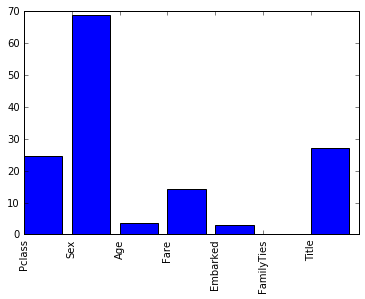

In [642]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import operator
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilyTies", "Title"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()



Interestingly, the largest catagories that, according to this model, mattered where sex, pclass, and title, followed by fare. I would have expected age to have made a larger difference. Perhaps since I used the log of ages, it now matters less for predicting the model, even if the accuracy went up after changing it. Not surprisingly, the familyTies catagory had very little effect on the model, and may be worth dropping altogether. 

In [643]:
# Pick only the four best features.
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=300, min_samples_split=8, min_samples_leaf=4)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)

print"Score:", scores.mean()

Score: 0.818264358265


I selected for only the top 4 catagories, and got a score of 81.8, which went down again. 

In [644]:
# Pick only the four best features.
predictors = ["Pclass", "Sex", "Age", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=300, min_samples_split=8, min_samples_leaf=4)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)

print"Score:", scores.mean()

Score: 0.833944478785


I'm still a believer in using Age, as my intuition tells me it is very important (as well as looking through the data). I plugged it back in, and got a much bette score, up to 83.4

### I think I'm ready to sumbit! 
##### I'm curious to how all of the testing, new features, and parameter tuning will do to my actual Kaggle score. I'm going to put together all of the tests that improved my score in theory, and then submit to kaggle to see if it was true!


In [645]:
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=150, max_depth=5), ["Pclass", "Sex", "Age", "Fare", "Embarked", "Title"]],
    [linear_model.LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "Title", "Age", "Embarked"]]
]
kf = KFold(titanic.shape[0], n_folds=4, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

predictions = np.concatenate(predictions, axis=0)

accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print "accuracy: ", accuracy



accuracy:  0.840628507295


/home/keenan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


I combined several features, using the gradient boosting classifier, selecting only the catagories that I knew were important, keeping the log of the ages, and parameter tuning for folds, estimators, and max depth, and got a score of about 84%!Now I'm going to generate a kaggle submission, and see how it compares! 

In [646]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "Title"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=150, max_depth=5), predictors],
    [linear_model.LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "Title", "Age", "Embarked"]]
]

full_predictions = []
for alg, predictors in algorithms:
    alg.fit(titanic[predictors], titanic["Survived"])
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)
    
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

submission.to_csv("kaggle4.csv", index=False)

KeyError: "['Title'] not in index"

I'm now getting an error which I cannot figure out. It won't let me us the Title feature when submitting. I tried submitting without the title class, and got a score that was lower than before. This is pretty annoying, but I guess a more complex model doesn't mean that its better. Anyways, I learned a lot during this project and hope to improve my score on a later date. 